# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [112]:
#Import all the necessary modules
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [69]:
pima_df=pd.read_csv('pima-indians-diabetes+(3).csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [70]:
pima_df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
487,0,173,78,32,265,46.5,1.159,58,0
309,2,124,68,28,205,32.9,0.875,30,1
221,2,158,90,0,0,31.6,0.805,66,1
622,6,183,94,0,0,40.8,1.461,45,0
190,3,111,62,0,0,22.6,0.142,21,0
429,1,95,82,25,180,35.0,0.233,43,1
94,2,142,82,18,64,24.7,0.761,21,0
591,2,112,78,50,140,39.4,0.175,24,0
324,2,112,75,32,0,35.7,0.148,21,0
498,7,195,70,33,145,25.1,0.163,55,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [71]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [72]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [73]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
print ("Number of 0 in 'Preg' coulmn is : ",pima_df.Preg[pima_df.Preg == 0].count())
print ("Number of 0 in 'Plas' coulmn is : ",pima_df.Plas[pima_df.Plas == 0].count())
print ("Number of 0 in 'Pres' coulmn is : ",pima_df.Pres[pima_df.Pres == 0].count())
print ("Number of 0 in 'skin' coulmn is : ",pima_df.skin[pima_df.skin == 0].count())
print ("Number of 0 in 'test' coulmn is : ",pima_df.test[pima_df.test == 0].count())
print ("Number of 0 in 'mass' coulmn is : ",pima_df.mass[pima_df.mass == 0].count())
print ("Number of 0 in 'pedi' coulmn is : ",pima_df.pedi[pima_df.pedi == 0].count())

Number of 0 in 'Preg' coulmn is :  111
Number of 0 in 'Plas' coulmn is :  5
Number of 0 in 'Pres' coulmn is :  35
Number of 0 in 'skin' coulmn is :  227
Number of 0 in 'test' coulmn is :  374
Number of 0 in 'mass' coulmn is :  11
Number of 0 in 'pedi' coulmn is :  0


In [75]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [76]:
pima_df.loc[ pima_df['Preg'] == 0, 'Preg' ] = pima_df['Preg'].median()
pima_df.loc[ pima_df['Plas'] == 0, 'Plas' ] = pima_df['Plas'].median()
pima_df.loc[ pima_df['Pres'] == 0, 'Pres' ] = pima_df['Pres'].median()
pima_df.loc[ pima_df['skin'] == 0, 'skin' ] = pima_df['skin'].median()
pima_df.loc[ pima_df['test'] == 0, 'test' ] = pima_df['test'].median()

In [77]:
##To validate wheather value has been replaced or not 
pima_df.head(20)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,72.0,23.0,30.5,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,23.0,30.5,0.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [78]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

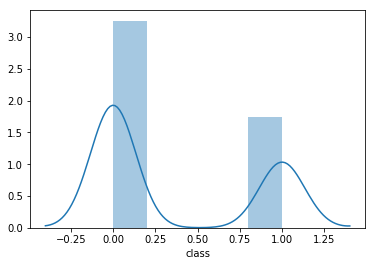

In [141]:
##sns.pairplot(df_indDiab,hue='class')
sns.distplot(pima_df['class'])
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [142]:
##Pres and test
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


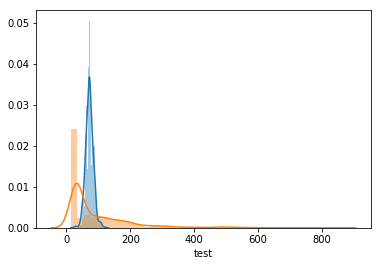

In [146]:
sns.distplot(pima_df['Pres'])
sns.distplot(pima_df['test'])
plt.show()

For field "Pres" It looks like we have somewhat normal distribution , also difference between 75% value and max is approximatly same as between 25% value and min. Also we have outlairs in "Pres" due to which we dont have perfect normal distribution.

For field "test" it looks like it is right tailed also also difference between 75% value and max is large as between 25% value and min.Also we have many outlaiers in "test" field .

{'whiskers': [<matplotlib.lines.Line2D at 0x190fa599c50>,
 'caps': [<matplotlib.lines.Line2D at 0x190fa5ad320>,
 'boxes': [<matplotlib.lines.Line2D at 0x190fa599828>],
 'medians': [<matplotlib.lines.Line2D at 0x190fa5ad9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x190fa5adcf8>],
 'means': []}

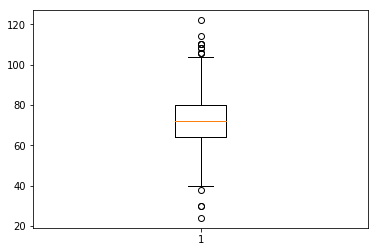

In [149]:
plt.boxplot(pima_df['Pres'])

{'whiskers': [<matplotlib.lines.Line2D at 0x190fa732fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x190fa18c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x190fa732ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x190fa18cd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x190fa18ce10>],
 'means': []}

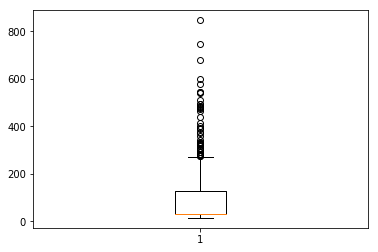

In [150]:
plt.boxplot(pima_df['test'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


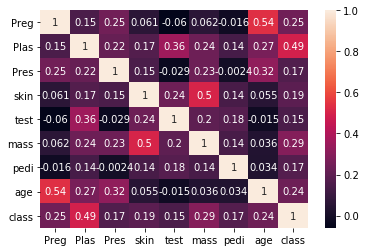

In [97]:
sns.heatmap(pima_df.corr(),annot=True)

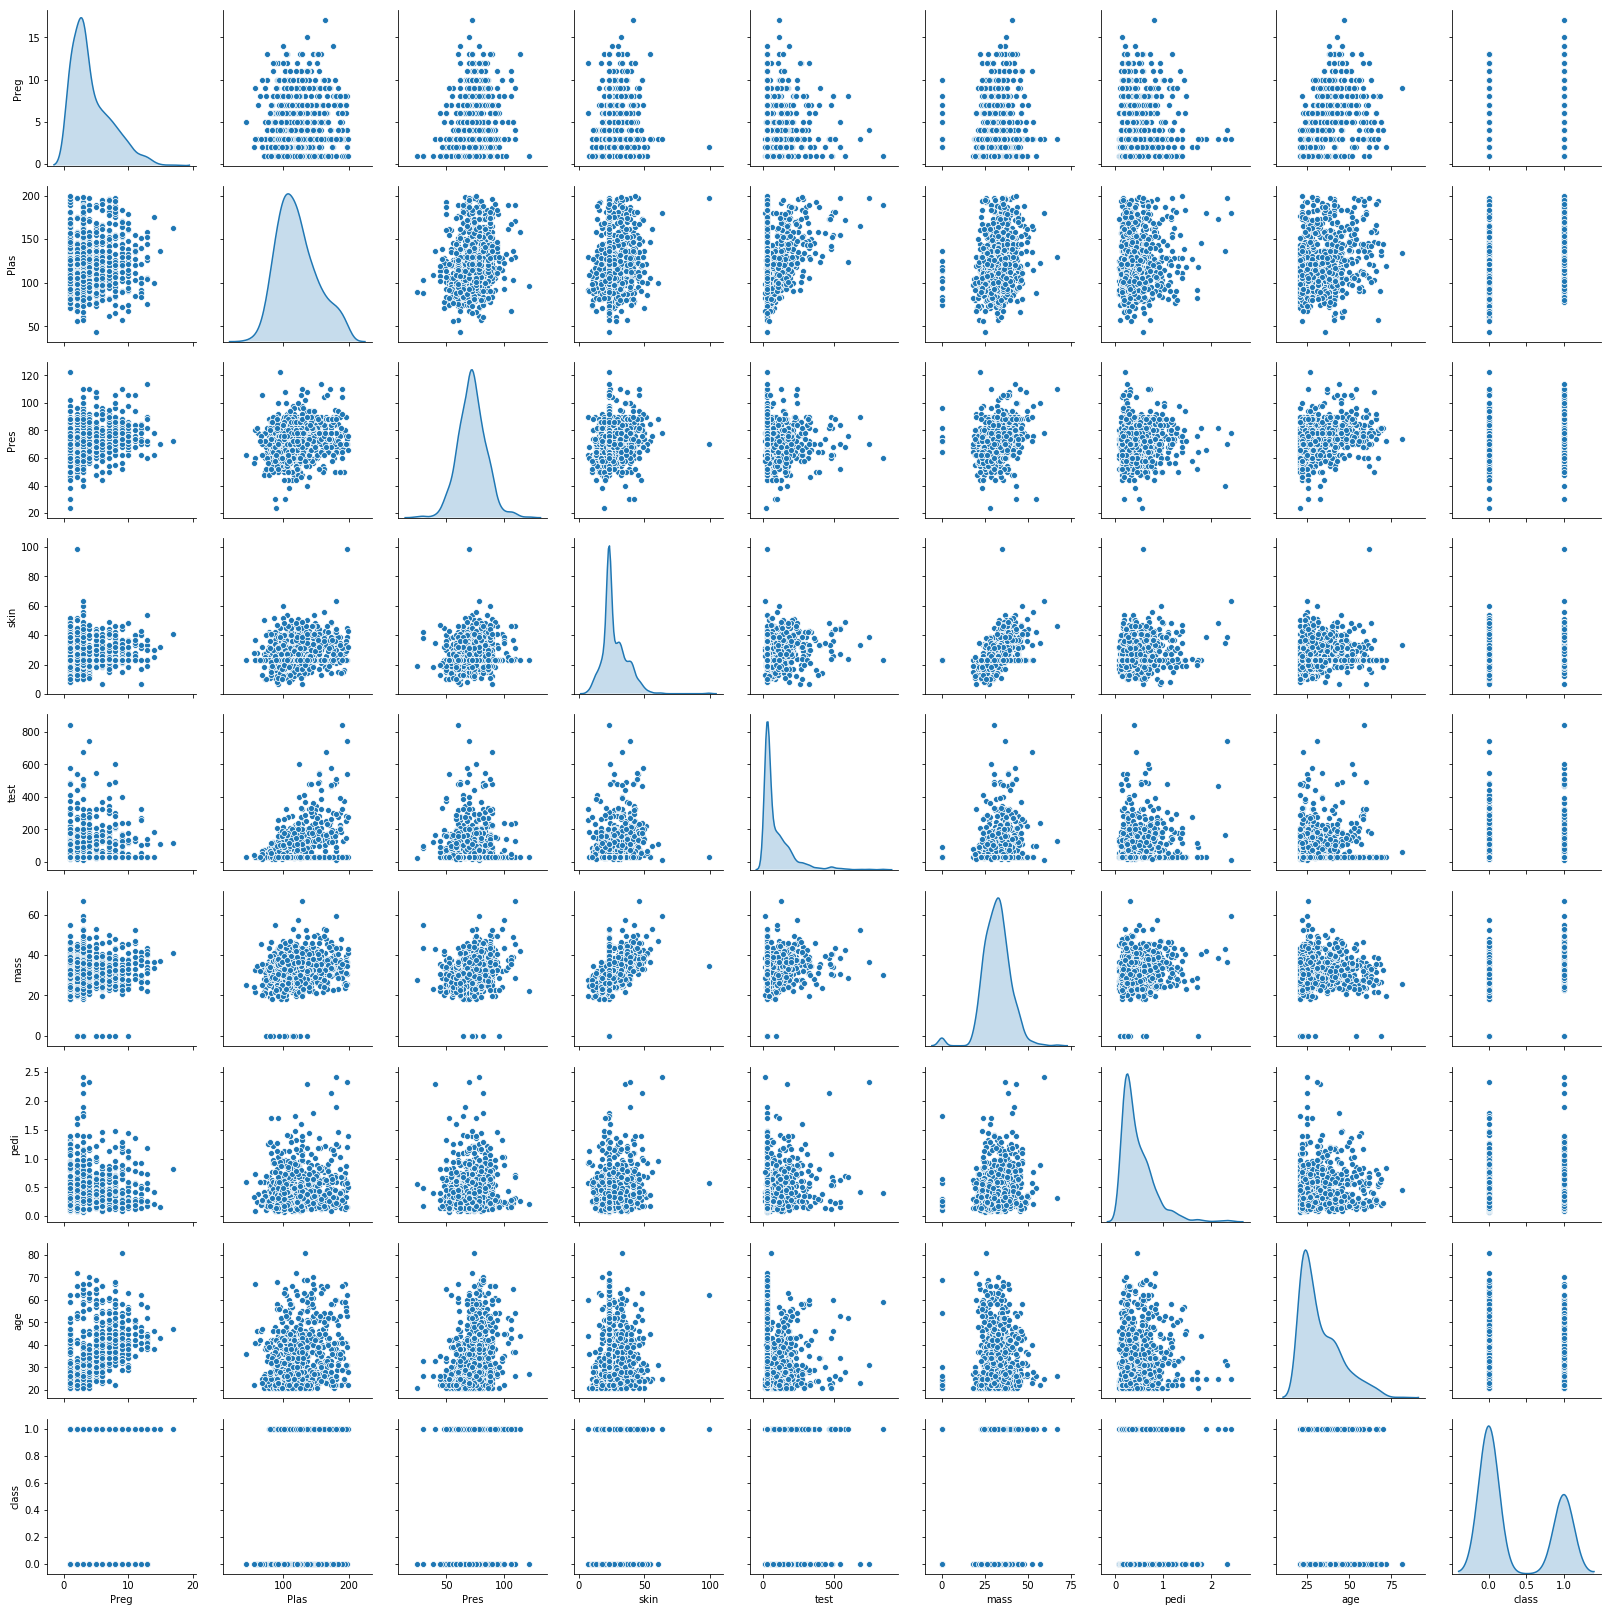

In [83]:
sns.pairplot(pima_df, diag_kind='kde')

Using the plot - infer the relationship between different variables

It seems like age and preg are partially corelated as cor value is 0.54 and after this set mass and skin are partially corellated as cor value is 0.5

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [88]:
X = pima_df.drop('class', axis = 1)
y = pima_df['class']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [117]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)
y_pred_class = dt_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [118]:
print("Test accuracy is : ",dt_model.score(X_test , y_test))
print("Train accuracy is : ",dt_model.score(X_train , y_train))

Test accuracy is :  0.7445887445887446
Train accuracy is :  1.0


In [135]:
cm = metrics.confusion_matrix(y_test, y_pred_class)
cm

array([[120,  27],
       [ 32,  52]], dtype=int64)

In [ ]:
##This code working fine on googleColab but not on Jupyter notebook

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Print the feature importance of the decision model - Optional

In [152]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(dt_model, k_features=8, forward=True, scoring='accuracy', cv=5)
sfs1.fit(X_train,y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.67592593, 0.74074074, 0.75925926, 0.73831776, 0.71698113]),
  'avg_score': 0.7262449630021486,
  'feature_names': ('Plas',),
  'ci_bound': 0.03664160288859303,
  'std_dev': 0.02850841188300562,
  'std_err': 0.01425420594150281},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([0.66666667, 0.74074074, 0.71296296, 0.72897196, 0.67924528]),
  'avg_score': 0.7057175232012121,
  'feature_names': ('Plas', 'test'),
  'ci_bound': 0.036560325590342176,
  'std_dev': 0.028445175383709508,
  'std_err': 0.01422258769185475},
 3: {'feature_idx': (1, 4, 7),
  'cv_scores': array([0.69444444, 0.72222222, 0.66666667, 0.74766355, 0.64150943]),
  'avg_score': 0.6945012637394933,
  'feature_names': ('Plas', 'test', 'age'),
  'ci_bound': 0.04869737266307787,
  'std_dev': 0.037888210341677823,
  'std_err': 0.018944105170838912},
 4: {'feature_idx': (0, 1, 4, 7),
  'cv_scores': array([0.65740741, 0.72222222, 0.69444444, 0.73831776, 0.6509434 ]),
  'avg_score'

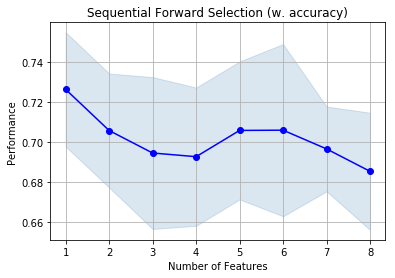

In [153]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. accuracy)')
plt.grid()
plt.show()

So we can say that by only one feature(i.e. "Plas") we are getting best accuracy .